In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('Toll_Data.csv')

df.shape

(367074, 15)

In [ ]:
df.head()

,SlNo.,merchant_name,direction,lane,tag_id,vehicle_regn_number,txn_amount,initiated_time,inn_rr_time_sec,vehicle_class_code,vehicle_comvehicle,geocode,merchant_sub_type,city,state
0,1,Bannerghatta Road (P2) Plaza,S,P2BX2,HXYUH,YFUNB,225,00-01-1900 21:54,994,VC4,F,"12.850056,77.588333",State,Bengaluru,Karnataka
1,2,Bannerghatta Road (P2) Plaza,S,P2BX2,JGEFQ,GQHLZ,225,00-01-1900 18:59,4528,VC20,T,"12.850056,77.588333",State,Bengaluru,Karnataka
2,3,Bannerghatta Road (P2) Plaza,S,P2BX2,VOAPH,DNTMI,150,00-01-1900 00:14,134,VC5,F,"12.850056,77.588333",State,Bengaluru,Karnataka
3,4,Kadathanamale Toll Plaza,S,LANE09,XBANK,ZMAOY,35,00-01-1900 18:19,80,VC20,F,"13.2123515,77.5535138",state,Bangalore,Karnataka
4,5,Kadathanamale Toll Plaza,S,LANE10,HMWDZ,IDSRZ,20,00-01-1900 15:03,64,VC4,F,"13.2123515,77.5535138",state,Bangalore,Karnataka


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367074 entries, 0 to 367073
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   SlNo.                367074 non-null  int64 
 1   merchant_name        367074 non-null  object
 2   direction            367074 non-null  object
 3   lane                 367074 non-null  object
 4   tag_id               367074 non-null  object
 5   vehicle_regn_number  367074 non-null  object
 6   txn_amount           367074 non-null  int64 
 7   initiated_time       367074 non-null  object
 8   inn_rr_time_sec      367074 non-null  int64 
 9   vehicle_class_code   367074 non-null  object
 10  vehicle_comvehicle   367074 non-null  object
 11  geocode              367074 non-null  object
 12  merchant_sub_type    367074 non-null  object
 13  city                 367074 non-null  object
 14  state                367074 non-null  object
dtypes: int64(3), object(12)
memory usa

In [ ]:
df.describe()

,SlNo.,txn_amount,inn_rr_time_sec
count,367074.000000,367074.000000,367074.00000
mean,183537.500000,82.721803,1005.41369
std,105965.280693,99.973898,9186.98848
min,1.000000,3.000000,0.00000
25%,91769.250000,30.000000,54.00000
50%,183537.500000,55.000000,84.00000
75%,275305.750000,115.000000,195.00000
max,367074.000000,2990.000000,253157.00000


In [ ]:
df.columns

Index(['SlNo.', 'merchant_name', 'direction', 'lane', 'tag_id',
       'vehicle_regn_number', 'txn_amount', 'initiated_time',
       'inn_rr_time_sec', 'vehicle_class_code', 'vehicle_comvehicle',
       'geocode', 'merchant_sub_type', 'city', 'state'],
      dtype='object')

In [ ]:
df['initiated_time'] = df['initiated_time'].astype(str).str.replace('00-01-1900', '').str.strip()

# 2. Convert the cleaned time string to datetime (time only)
df['initiated_time'] = pd.to_datetime(df['initiated_time'], format='%H:%M')
print(df[['initiated_time']].head())
print(f"\nData type after conversion: {df['initiated_time'].dtype}")

       initiated_time
0 1900-01-01 21:54:00
1 1900-01-01 18:59:00
2 1900-01-01 00:14:00
3 1900-01-01 18:19:00
4 1900-01-01 15:03:00

Data type after conversion: datetime64[ns]


In [ ]:
df['hour'] = df['initiated_time'].dt.strftime("%H")
df['minute'] = df['initiated_time'].dt.strftime("%M")

In [ ]:
df.drop(columns=['SlNo.', 'tag_id', 'vehicle_regn_number', 'initiated_time'], inplace=True)

In [ ]:
# Create 'heavy_vehicle' column
df['heavy_vehicle'] = df['vehicle_class_code'].apply(lambda x: 'F' if x in ['VC4', 'VC5', 'VC6', 'VC20', 'VC1', 'VC2', 'VC3'] else 'T')

In [ ]:
df.head()

,merchant_name,direction,lane,txn_amount,inn_rr_time_sec,vehicle_class_code,vehicle_comvehicle,geocode,merchant_sub_type,city,state,hour,minute,heavy_vehicle
0,Bannerghatta Road (P2) Plaza,S,P2BX2,225,994,VC4,F,"12.850056,77.588333",State,Bengaluru,Karnataka,21,54,F
1,Bannerghatta Road (P2) Plaza,S,P2BX2,225,4528,VC20,T,"12.850056,77.588333",State,Bengaluru,Karnataka,18,59,F
2,Bannerghatta Road (P2) Plaza,S,P2BX2,150,134,VC5,F,"12.850056,77.588333",State,Bengaluru,Karnataka,00,14,F
3,Kadathanamale Toll Plaza,S,LANE09,35,80,VC20,F,"13.2123515,77.5535138",state,Bangalore,Karnataka,18,19,F
4,Kadathanamale Toll Plaza,S,LANE10,20,64,VC4,F,"13.2123515,77.5535138",state,Bangalore,Karnataka,15,03,F


In [ ]:
df['merchant_name'].nunique()

17

In [ ]:
df['merchant_name'].unique()

array(['Bannerghatta Road (P2) Plaza', 'Kadathanamale Toll Plaza',
       'Kanakapura Road (P3) Plaza', 'ELECTRONIC  CITY Phase 1',
       'Tumkur Road (P7) Toll', 'Magadi Road (P6) Plaza',
       'Kulumapalya toll plaza', 'Hosur Road (P1) Toll',
       'Laxamannath Plaza', 'Banglaore-Nelamangala Plaza',
       'Mysore Road (P5) Plaza', 'Link Road (L1) Toll', 'ATTIBELLE ',
       'Nelamangala Toll Plaza', 'Devanahalli Toll Plaza',
       'Hoskote Toll Plaza', 'Kaniminike Toll Plaza'], dtype=object)

In [ ]:
df['merchant_sub_type'].unique()

array(['State', 'state', 'National'], dtype=object)

In [ ]:
df['merchant_sub_type'].nunique()

3

In [ ]:
df['city'].nunique()

4

In [ ]:
df['city'].unique()

array(['Bengaluru', 'Bangalore\xa0', 'Bangalore Urban', 'Bangalore Rural'],
      dtype=object)

In [ ]:
df['city'].replace('Bangalore\xa0', 'Bangalore', inplace = True)

<ipython-input-475-58e592450cc9>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
df['city'].unique()

array(['Bengaluru', 'Bangalore', 'Bangalore Urban', 'Bangalore Rural'],
      dtype=object)

In [ ]:
df['merchant_sub_type'].replace('state', 'State', inplace = True)

<ipython-input-477-ad5cfe75ca06>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
df['merchant_sub_type'].unique()

array(['State', 'National'], dtype=object)

In [ ]:
input_cols = list(df.columns)

In [ ]:
input_cols

['merchant_name',
 'direction',
 'lane',
 'txn_amount',
 'inn_rr_time_sec',
 'vehicle_class_code',
 'vehicle_comvehicle',
 'geocode',
 'merchant_sub_type',
 'city',
 'state',
 'hour',
 'minute',
 'heavy_vehicle']

In [ ]:
input_cols = ['merchant_name',
 'direction',
 'lane',
 'tag_id',
 'vehicle_regn_number',
 'txn_amount',
 'initiated_time',
 'vehicle_class_code',
 'vehicle_comvehicle',
 #'geocode',
 'merchant_sub_type',
 #'city',
 #'state',
 'hour',
 'minute'
 ]

input_cols

['merchant_name',
 'direction',
 'lane',
 'tag_id',
 'vehicle_regn_number',
 'txn_amount',
 'initiated_time',
 'vehicle_class_code',
 'vehicle_comvehicle',
 'merchant_sub_type',
 'hour',
 'minute']

In [ ]:
target_col = ['inn_rr_time_sec']

In [ ]:
def hist(column_name):
  fig = px.histogram(df,
                      x = column_name,
                      y = target_col,
                      title = f'{column_name} v/s {target_col[0]}')
  fig.show()

# fig = px.histogram(medical_df,
#                    x='age',
#                    marginal='box',
#                    nbins=47,
#                    title='Distribution of Age')
# fig.update_layout(bargap=0.1)
# fig.show()

In [ ]:
hist_cols = ['merchant_name',
 'direction',
 'lane',
 'txn_amount',
 'vehicle_class_code',
 'vehicle_comvehicle',
 'merchant_sub_type',
 'hour',
 'minute'
 ]

# for column in input_cols:
#   hist(column)

# hist('merchant_name')

In [ ]:
df['merchant_name'].unique()

array(['Bannerghatta Road (P2) Plaza', 'Kadathanamale Toll Plaza',
       'Kanakapura Road (P3) Plaza', 'ELECTRONIC  CITY Phase 1',
       'Tumkur Road (P7) Toll', 'Magadi Road (P6) Plaza',
       'Kulumapalya toll plaza', 'Hosur Road (P1) Toll',
       'Laxamannath Plaza', 'Banglaore-Nelamangala Plaza',
       'Mysore Road (P5) Plaza', 'Link Road (L1) Toll', 'ATTIBELLE ',
       'Nelamangala Toll Plaza', 'Devanahalli Toll Plaza',
       'Hoskote Toll Plaza', 'Kaniminike Toll Plaza'], dtype=object)

In [ ]:
df['vehicle_class_code'].unique()

array(['VC4', 'VC20', 'VC5', 'VC7', 'VC10', 'VC9', 'VC13', 'VC12', 'VC11',
       'VC8', 'VC15', 'VC14', 'VC16', 'VC6'], dtype=object)

In [ ]:
vehicle_class_avg_time = df.groupby('vehicle_class_code')['inn_rr_time_sec'].mean().reset_index()
vehicle_class_avg_time = vehicle_class_avg_time.sort_values(by='inn_rr_time_sec', ascending=False)  # Largest to smallest

In [ ]:
vehicle_class_avg_time

,vehicle_class_code,inn_rr_time_sec
5,VC15,2541.465517
4,VC14,1756.540156
2,VC12,1263.170720
13,VC9,1249.308422
9,VC5,1113.125386
0,VC10,1099.452395
1,VC11,1053.437430
3,VC13,1046.638715
7,VC20,985.852880
8,VC4,977.447882


In [ ]:
df['vehicle_comvehicle'].value_counts()

,count
vehicle_comvehicle,
F,240698
T,126376


In [ ]:
vehicle_commercial_avg_time = df.groupby('vehicle_comvehicle')['inn_rr_time_sec'].mean().reset_index()
vehicle_commercial_avg_time = vehicle_commercial_avg_time.sort_values(by='inn_rr_time_sec', ascending=False)  # Largest to smallest

In [ ]:
vehicle_commercial_avg_time

,vehicle_comvehicle,inn_rr_time_sec
1,T,1019.576067
0,F,997.977881


In [ ]:
df['heavy_vehicle'].value_counts()

,count
heavy_vehicle,
F,296550
T,70524


In [ ]:
vehicle_heavy_avg_time = df.groupby('heavy_vehicle')['inn_rr_time_sec'].mean().reset_index()
vehicle_heavy_avg_time = vehicle_heavy_avg_time.sort_values(by='inn_rr_time_sec', ascending=False)  # Largest to smallest

In [ ]:
vehicle_heavy_avg_time

,heavy_vehicle,inn_rr_time_sec
1,T,1084.432491
0,F,986.621845


In [ ]:
  # Filter for only 'Link Road (L1) Toll'
# df_l1_toll = df[df['merchant_name'] == 'Link Road (L1) Toll' and df['direction'] == 'N']

# Filter for only 'Link Road (L1) Toll'
df_hoskote = df[(df['merchant_name'] == 'Hoskote Toll Plaza')]

In [ ]:
df_hoskote['lane'].unique()

array(['Lane1', 'Lane4', 'Lane7', 'Lane2', 'Lane5', 'L1', 'Lane11',
       'Lane9', 'Lane12', 'Lane10', 'Lane3', 'Lane6', 'Lane8', 'Lane13'],
      dtype=object)

In [ ]:
# Filter for only 'Link Road (L1) Toll'
df_hoskote_lane5 = df[(df['lane'] == 'Lane5')]

In [ ]:
df_hoskote_lane5

,merchant_name,direction,lane,txn_amount,inn_rr_time_sec,vehicle_class_code,vehicle_comvehicle,geocode,merchant_sub_type,city,state,hour,minute,heavy_vehicle
2544,Kulumapalya toll plaza,N,Lane5,25,188,VC4,F,"13.114638,77.37463",National,Bangalore Rural,Karnataka,04,39,F
2555,Kulumapalya toll plaza,N,Lane5,25,1188,VC4,F,"13.114638,77.37463",National,Bangalore Rural,Karnataka,10,07,F
2556,Kulumapalya toll plaza,N,Lane5,25,190,VC4,F,"13.114638,77.37463",National,Bangalore Rural,Karnataka,05,58,F
2573,Kulumapalya toll plaza,N,Lane5,25,430,VC4,F,"13.114638,77.37463",National,Bangalore Rural,Karnataka,08,25,F
2574,Kulumapalya toll plaza,N,Lane5,25,183,VC4,T,"13.114638,77.37463",National,Bangalore Rural,Karnataka,07,51,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367000,Hoskote Toll Plaza,N,Lane5,25,193,VC4,F,"13.059436,77.770734",National,Bangalore Rural,Karnataka,20,46,F
367003,Hoskote Toll Plaza,N,Lane5,10,321,VC4,F,"13.059436,77.770734",National,Bangalore Rural,Karnataka,22,42,F
367030,Hoskote Toll Plaza,N,Lane5,10,288,VC4,F,"13.059436,77.770734",National,Bangalore Rural,Karnataka,06,46,F
367033,Hoskote Toll Plaza,N,Lane5,80,251,VC10,T,"13.059436,77.770734",National,Bangalore Rural,Karnataka,13,28,T


In [ ]:
fig = px.histogram(df_hoskote,
                   x = 'lane',
                   color = 'vehicle_class_code')

fig.show()

In [ ]:
fig = px.histogram(df_hoskote,
                   x = 'hour',
                   color = 'vehicle_class_code',
                   category_orders={'hour': sorted(df_hoskote['hour'].unique())})

fig.show()

In [ ]:
fig = px.histogram(df_hoskote,
                   x = 'hour',
                   color = 'vehicle_comvehicle',
                   category_orders={'hour': sorted(df_hoskote['hour'].unique())})

fig.show()

In [ ]:
# Create 'heavy_vehicle' column
df['heavy_vehicle'] = df['vehicle_class_code'].apply(lambda x: 'F' if x in ['VC4', 'VC5', 'VC6', 'VC20', 'VC1', 'VC2', 'VC3'] else 'T')

In [ ]:
df.head()

,merchant_name,direction,lane,txn_amount,inn_rr_time_sec,vehicle_class_code,vehicle_comvehicle,geocode,merchant_sub_type,city,state,hour,minute,heavy_vehicle
0,Bannerghatta Road (P2) Plaza,S,P2BX2,225,994,VC4,F,"12.850056,77.588333",State,Bengaluru,Karnataka,21,54,F
1,Bannerghatta Road (P2) Plaza,S,P2BX2,225,4528,VC20,T,"12.850056,77.588333",State,Bengaluru,Karnataka,18,59,F
2,Bannerghatta Road (P2) Plaza,S,P2BX2,150,134,VC5,F,"12.850056,77.588333",State,Bengaluru,Karnataka,00,14,F
3,Kadathanamale Toll Plaza,S,LANE09,35,80,VC20,F,"13.2123515,77.5535138",State,Bangalore,Karnataka,18,19,F
4,Kadathanamale Toll Plaza,S,LANE10,20,64,VC4,F,"13.2123515,77.5535138",State,Bangalore,Karnataka,15,03,F


In [ ]:
fig = px.histogram(df_hoskote,
                   x = 'heavy_vehicle',
                   color = 'vehicle_comvehicle',
                   category_orders={'hour': sorted(df_hoskote['hour'].unique())})

fig.show()

In [ ]:
fig = px.histogram(df_hoskote,
                   x = 'hour',
                   color = 'heavy_vehicle',
                   category_orders={'hour': sorted(df_hoskote['hour'].unique())})

fig.show()

In [ ]:
fig = px.bar(df_hoskote,
                   x = 'vehicle_class_code',
                   y = 'txn_amount')

fig.show()

In [ ]:
hourly_txn_sum = df.groupby('hour')['txn_amount'].sum().reset_index()

In [ ]:
hourly_txn_sum

,hour,txn_amount
0,00,1018245
1,01,917015
2,02,790608
3,03,755165
4,04,805013
5,05,893953
6,06,1305980
7,07,1388763
8,08,1550724
9,09,1472301


In [ ]:
fig = px.histogram(df_hoskote,
                   x = ['amt_hour0'],
                   category_orders={'hour': sorted(df_hoskote['hour'].unique())},
                   color_discrete_sequence=['#1f77b4'])

fig.show()

In [ ]:
vehicle_class_avg_time = df.groupby('vehicle_class_code')['inn_rr_time_sec'].mean().reset_index()
vehicle_class_avg_time = vehicle_class_avg_time.sort_values(by='inn_rr_time_sec', ascending=False)  # Largest to smallest

In [ ]:
vehicle_class_avg_time

,vehicle_class_code,inn_rr_time_sec
5,VC15,2541.465517
4,VC14,1756.540156
2,VC12,1263.170720
13,VC9,1249.308422
9,VC5,1113.125386
0,VC10,1099.452395
1,VC11,1053.437430
3,VC13,1046.638715
7,VC20,985.852880
8,VC4,977.447882


In [ ]:
df['inn_rr_time_sec'].describe()

,inn_rr_time_sec
count,367074.00000
mean,1005.41369
std,9186.98848
min,0.00000
25%,54.00000
50%,84.00000
75%,195.00000
max,253157.00000


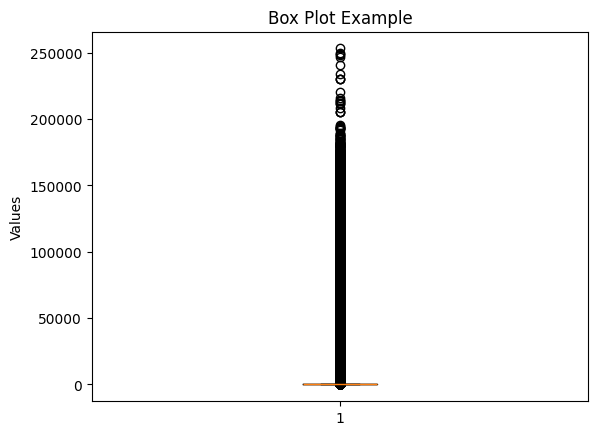

In [ ]:

# Create Box Plot
plt.boxplot(df['inn_rr_time_sec'])

# Labels
plt.title("Box Plot Example")
plt.ylabel("Values")

# Show Plot
plt.show()


In [ ]:
df = df[df['inn_rr_time_sec'] < 300]

In [ ]:
df['inn_rr_time_sec'].describe()

,inn_rr_time_sec
count,311345.000000
mean,96.318152
std,65.657179
min,0.000000
25%,47.000000
50%,72.000000
75%,124.000000
max,299.000000


In [ ]:
df.describe()

,txn_amount,inn_rr_time_sec
count,311345.00000,311345.000000
mean,84.95417,96.318152
std,99.28741,65.657179
min,3.00000,0.000000
25%,30.00000,47.000000
50%,55.00000,72.000000
75%,115.00000,124.000000
max,2825.00000,299.000000


In [ ]:
df.head()

,merchant_name,direction,lane,txn_amount,inn_rr_time_sec,vehicle_class_code,vehicle_comvehicle,geocode,merchant_sub_type,city,state,hour,minute,heavy_vehicle
2,Bannerghatta Road (P2) Plaza,S,P2BX2,150,134,VC5,F,"12.850056,77.588333",State,Bengaluru,Karnataka,00,14,F
3,Kadathanamale Toll Plaza,S,LANE09,35,80,VC20,F,"13.2123515,77.5535138",State,Bangalore,Karnataka,18,19,F
4,Kadathanamale Toll Plaza,S,LANE10,20,64,VC4,F,"13.2123515,77.5535138",State,Bangalore,Karnataka,15,03,F
5,Kadathanamale Toll Plaza,S,LANE10,20,57,VC4,F,"13.2123515,77.5535138",State,Bangalore,Karnataka,16,48,F
7,Kadathanamale Toll Plaza,S,LANE08,50,80,VC4,F,"13.2123515,77.5535138",State,Bangalore,Karnataka,06,13,F


In [ ]:
df_hoskote['initiated_time'] = pd.to_datetime(df_hoskote['hour'].astype(str) + ':' + df_hoskote['minute'].astype(str) + ':00', format='%H:%M:%S') # remove .dt.time

In [ ]:
df_hoskote = df_hoskote.sort_values(by=['initiated_time'])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

class TollQueueModel:
    def __init__(self, df):
        self.df = df

    def calculate_metrics_per_lane(self):
        lanes = self.df['lane'].unique()
        self.metrics = {}

        for lane in lanes:
            lane_df = self.df[self.df['lane'] == lane]
            throughput_per_hour = lane_df.groupby('hour').size()
            revenue_per_hour = lane_df.groupby('hour')['txn_amount'].sum()

            lane_df = lane_df.sort_values('initiated_time')
            lane_df['inter_arrival_time'] = lane_df['initiated_time'].diff().dt.total_seconds().fillna(0)
            arrival_rate_per_hour = throughput_per_hour / 3600
            service_rate_per_hour = 1 / lane_df.groupby('hour')['inn_rr_time_sec'].mean()

            utilization = arrival_rate_per_hour / service_rate_per_hour
            utilization[utilization >= 1] = np.nan  # Handle invalid cases

            avg_queue_length = (utilization ** 2 / (1 - utilization)).fillna(0)
            avg_waiting_time = (avg_queue_length / arrival_rate_per_hour).fillna(0)

            self.metrics[lane] = {
                'throughput_per_hour': throughput_per_hour,
                'revenue_per_hour': revenue_per_hour,
                'utilization': utilization,
                'avg_queue_length': avg_queue_length,
                'avg_waiting_time': avg_waiting_time
            }

    def visualize_lane_metrics(self, lane):
        if lane not in self.metrics:
            print(f"Lane {lane} not found.")
            return

        metrics = self.metrics[lane]
        fig, axs = plt.subplots(3, 1, figsize=(12, 15))

        axs[0].bar(metrics['utilization'].index, metrics['utilization'].values, color='skyblue')
        axs[0].set_title(f'Hourly Utilization (ρ) - Lane {lane}')
        axs[0].set_ylabel('Utilization')
        axs[0].set_xlabel('Hour of the Day')
        axs[0].grid()

        axs[1].bar(metrics['avg_queue_length'].index, metrics['avg_queue_length'].values, color='orange')
        axs[1].set_title(f'Average Queue Length (Lq) per Hour - Lane {lane}')
        axs[1].set_ylabel('Average Queue Length')
        axs[1].set_xlabel('Hour of the Day')
        axs[1].grid()

        axs[2].bar(metrics['avg_waiting_time'].index, metrics['avg_waiting_time'].values, color='green')
        axs[2].set_title(f'Average Waiting Time (Wq) per Hour (seconds) - Lane {lane}')
        axs[2].set_ylabel('Average Waiting Time (s)')
        axs[2].set_xlabel('Hour of the Day')
        axs[2].grid()

        plt.tight_layout()
        plt.show()

    def print_summary(self):
        for lane, metrics in self.metrics.items():
            total_throughput = metrics['throughput_per_hour'].sum()
            total_revenue = metrics['revenue_per_hour'].sum()
            print(f"\n=== Lane {lane} Summary ===")
            print(f"Total throughput for the day: {total_throughput} vehicles")
            print(f"Total revenue for the day: INR {total_revenue:.2f}")
            print("Queueing Model Performance Metrics:")
            print(metrics['utilization'].describe().to_string())
            print("Average Waiting Time (seconds) per hour:")
            print(metrics['avg_waiting_time'].round(2))

# Example usage:
# Assuming df_hoskote is preprocessed and available
toll_model = TollQueueModel(df_hoskote_2)
toll_model.calculate_metrics_per_lane()
toll_model.print_summary()

# Visualize for a specific lane (replace 'Lane_1' with an actual lane ID)
# toll_model.visualize_lane_metrics('Lane_1')



=== Lane Lane4 Summary ===
Total throughput for the day: 3724 vehicles
Total revenue for the day: INR 133770.00
Queueing Model Performance Metrics:
count    24.000000
mean      0.046460
std       0.080400
min       0.004181
25%       0.008029
50%       0.019631
75%       0.029802
max       0.337008
Average Waiting Time (seconds) per hour:
hour
00    0.00
01    0.00
02    0.02
03    0.00
04    0.00
05    0.00
06    0.00
07    0.00
08    0.00
09    0.00
10    3.81
11    0.87
12    0.01
13    0.06
14    0.02
15    0.75
16    0.00
17    0.01
18    0.03
19    0.01
20    0.03
21    0.00
22    0.01
23    0.01
dtype: float64

=== Lane Lane9 Summary ===
Total throughput for the day: 3311 vehicles
Total revenue for the day: INR 124080.00
Queueing Model Performance Metrics:
count    24.000000
mean      0.050766
std       0.108388
min       0.002491
25%       0.009196
50%       0.014325
75%       0.024836
max       0.477533
Average Waiting Time (seconds) per hour:
hour
00    0.00
01    0.00
02   

In [ ]:
df_hoskote_2 = df_hoskote.copy()

In [ ]:
df_hoskote_2['inn_rr_time_sec'] = df_hoskote_2['inn_rr_time_sec'] / 1000

In [ ]:
df_hoskote_2.head()

,merchant_name,direction,lane,txn_amount,inn_rr_time_sec,vehicle_class_code,vehicle_comvehicle,geocode,merchant_sub_type,city,state,hour,minute,heavy_vehicle,initiated_time
352737,Hoskote Toll Plaza,N,Lane4,130,0.261,VC13,T,"13.059436,77.770734",National,Bangalore Rural,Karnataka,00,01,T,1900-01-01 00:01:00
358710,Hoskote Toll Plaza,N,Lane4,40,0.197,VC5,T,"13.059436,77.770734",National,Bangalore Rural,Karnataka,00,01,F,1900-01-01 00:01:00
337965,Hoskote Toll Plaza,S,Lane9,10,0.296,VC4,F,"13.059436,77.770734",National,Bangalore Rural,Karnataka,00,01,F,1900-01-01 00:01:00
336114,Hoskote Toll Plaza,N,Lane6,10,0.225,VC4,F,"13.059436,77.770734",National,Bangalore Rural,Karnataka,00,01,F,1900-01-01 00:01:00
324555,Hoskote Toll Plaza,S,Lane8,10,0.305,VC4,F,"13.059436,77.770734",National,Bangalore Rural,Karnataka,00,01,F,1900-01-01 00:01:00


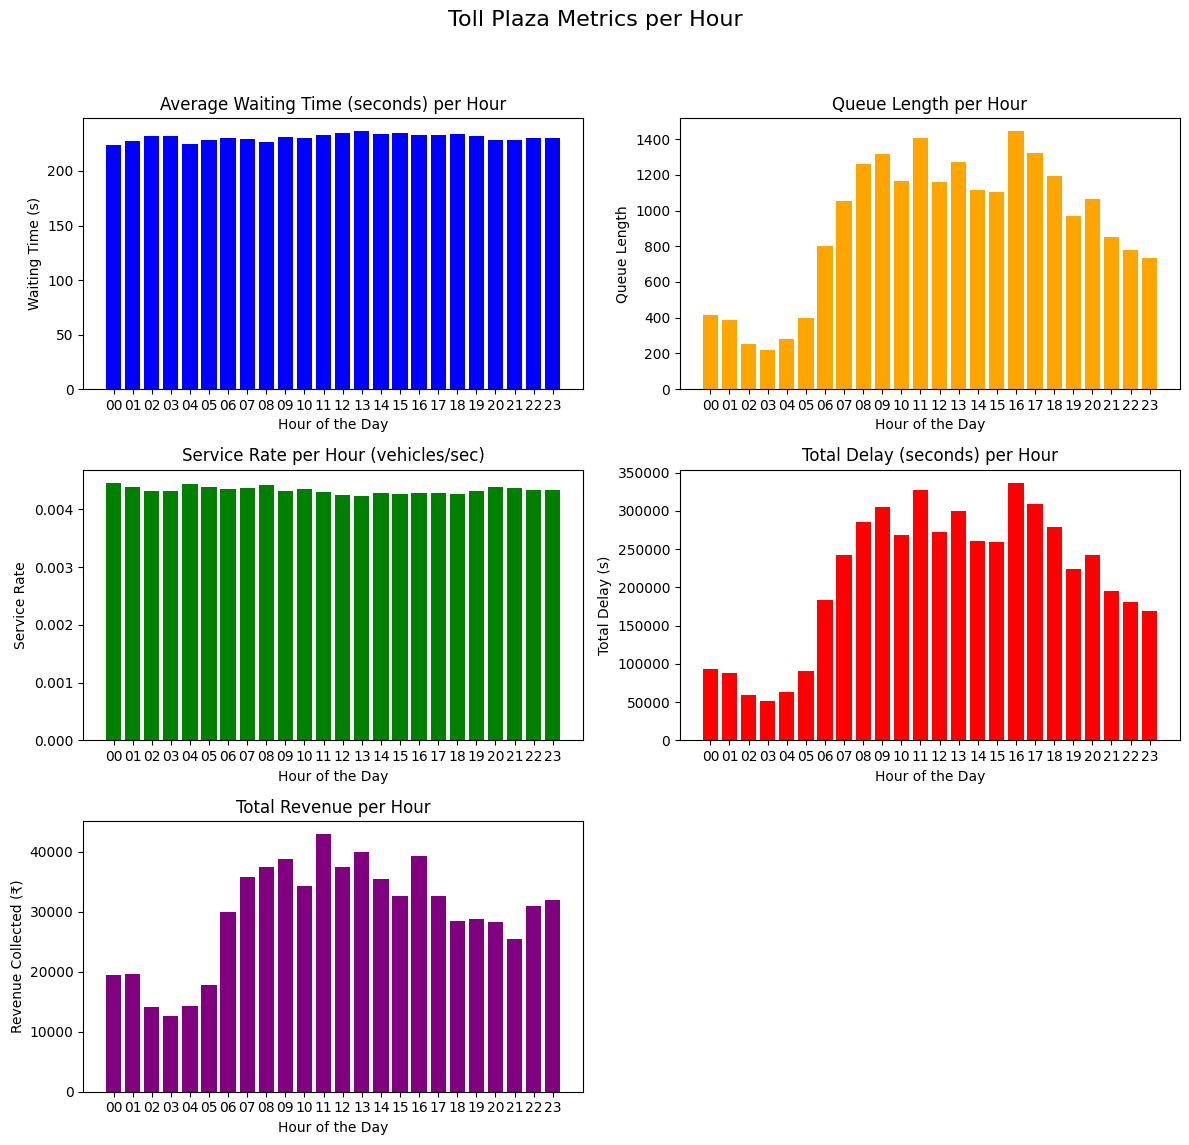

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df_hoskote = df_hoskote[df_hoskote['inn_rr_time_sec'] < 300]
# Compute key optimization metrics per hour
hourly_metrics = df_hoskote.groupby('hour').agg({
    'inn_rr_time_sec': ['mean', 'sum'],  # Average Waiting Time & Total Delay per hour
    'txn_amount': 'sum',  # Total Revenue per hour
    'lane': 'count'  # Proxy for Queue Length (total transactions per hour)
}).reset_index()

# Rename columns for clarity
hourly_metrics.columns = ['hour', 'avg_waiting_time', 'total_delay', 'total_revenue', 'queue_length']

# Compute Service Rate per hour (1 / avg service time per vehicle)
hourly_metrics['service_rate'] = 1 / hourly_metrics['avg_waiting_time']

# Set up figure and axes for subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle("Toll Plaza Metrics per Hour", fontsize=16)

# Bar plots for each metric
axs[0, 0].bar(hourly_metrics['hour'], hourly_metrics['avg_waiting_time'], color='blue')
axs[0, 0].set_title('Average Waiting Time (seconds) per Hour')
axs[0, 0].set_xlabel('Hour of the Day')
axs[0, 0].set_ylabel('Waiting Time (s)')

axs[0, 1].bar(hourly_metrics['hour'], hourly_metrics['queue_length'], color='orange')
axs[0, 1].set_title('Queue Length per Hour')
axs[0, 1].set_xlabel('Hour of the Day')
axs[0, 1].set_ylabel('Queue Length')

axs[1, 0].bar(hourly_metrics['hour'], hourly_metrics['service_rate'], color='green')
axs[1, 0].set_title('Service Rate per Hour (vehicles/sec)')
axs[1, 0].set_xlabel('Hour of the Day')
axs[1, 0].set_ylabel('Service Rate')

axs[1, 1].bar(hourly_metrics['hour'], hourly_metrics['total_delay'], color='red')
axs[1, 1].set_title('Total Delay (seconds) per Hour')
axs[1, 1].set_xlabel('Hour of the Day')
axs[1, 1].set_ylabel('Total Delay (s)')

axs[2, 0].bar(hourly_metrics['hour'], hourly_metrics['total_revenue'], color='purple')
axs[2, 0].set_title('Total Revenue per Hour')
axs[2, 0].set_xlabel('Hour of the Day')
axs[2, 0].set_ylabel('Revenue Collected (₹)')

# Hide empty subplot (since we have 5 metrics but 6 slots)
axs[2, 1].axis('off')

# Adjust layout and show the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
df.head()

,merchant_name,direction,lane,txn_amount,inn_rr_time_sec,vehicle_class_code,vehicle_comvehicle,geocode,merchant_sub_type,city,state,hour,minute,heavy_vehicle
2,Bannerghatta Road (P2) Plaza,S,P2BX2,150,134,VC5,F,"12.850056,77.588333",State,Bengaluru,Karnataka,00,14,F
3,Kadathanamale Toll Plaza,S,LANE09,35,80,VC20,F,"13.2123515,77.5535138",State,Bangalore,Karnataka,18,19,F
4,Kadathanamale Toll Plaza,S,LANE10,20,64,VC4,F,"13.2123515,77.5535138",State,Bangalore,Karnataka,15,03,F
5,Kadathanamale Toll Plaza,S,LANE10,20,57,VC4,F,"13.2123515,77.5535138",State,Bangalore,Karnataka,16,48,F
7,Kadathanamale Toll Plaza,S,LANE08,50,80,VC4,F,"13.2123515,77.5535138",State,Bangalore,Karnataka,06,13,F


In [ ]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from collections import deque



# Preprocess dataset
df['initiated_time'] = df['hour'] * 3600 + df['minute'] * 60  # Convert time to seconds

# Fix lane utilization calculation (prevent division by zero)
df['lane_utilization'] = df['txn_amount'] / (df['inn_rr_time_sec'] + 1e-6)

# Normalize utilization (scale between 0 and 1)
df['lane_utilization'] = df['lane_utilization'] / (df['lane_utilization'].max() + 1e-6)

lanes = df['lane'].unique()
state_size = len(lanes)  # Number of lanes
action_size = len(lanes)  # Actions: Assign vehicle to a lane

# Q-learning parameters
gamma = 0.95
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
learning_rate = 0.001
batch_size = 32
memory = deque(maxlen=2000)

# Define DQN model
def build_model():
    model = Sequential([
        Dense(24, input_dim=state_size, activation="relu"),
        Dense(24, activation="relu"),
        Dense(action_size, activation="linear")
    ])
    model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
    return model

model = build_model()

# Function to train agent
def train_agent(epochs=1000):
    global epsilon
    for e in range(epochs):
        state = np.zeros(state_size)  # Initial empty state
        total_reward = 0

        for t in range(len(df)):
            if np.random.rand() <= epsilon:
                action = random.randrange(action_size)  # Explore
            else:
                action = np.argmax(model.predict(state.reshape(1, -1)))  # Exploit

            next_state = state.copy()
            next_state[action] = min(next_state[action] + 1, 10)  # Cap lane usage

            # Compute reward (prevent -inf values)
            utilization = df.iloc[t]['lane_utilization']
            reward = -utilization if utilization < 1 else -10  # Penalize congestion

            memory.append((state, action, reward, next_state))
            state = next_state
            total_reward += reward

        # Experience replay
        if len(memory) > batch_size:
            minibatch = random.sample(memory, batch_size)
            for s, a, r, ns in minibatch:
                target = r + gamma * np.amax(model.predict(ns.reshape(1, -1)))
                target_f = model.predict(s.reshape(1, -1))
                target_f[0][a] = target
                model.fit(s.reshape(1, -1), target_f, epochs=1, verbose=0)

        # Decay exploration rate
        if epsilon > epsilon_min:
            epsilon *= epsilon_decay

        print(f"Epoch {e+1}/{epochs}, Total Reward: {total_reward:.2f}")

# Train the model
train_agent(epochs=5)

# Save model
model.save("toll_lane_optimizer.h5")

# Function to predict optimal lane
def assign_lane(current_state):
    return np.argmax(model.predict(np.array(current_state).reshape(1, -1)))

# Example usage
sample_state = np.zeros(state_size)
optimal_lane = assign_lane(sample_state)
print(f"Optimal lane to allocate next vehicle: Lane {optimal_lane}")


Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/s

KeyboardInterrupt: 